### Provide required inputs

1. the schema
2. its compling dataset

In [114]:
schema = "./Examples/Cycling_facilities/schema.json"
dataset = "./Examples/Cycling_facilities/data.geojson"

### Import the right extractor according to provided inputs

Presently, we propose two extractors:
1. read_jsonSchema_geojsonData
2. read_tableSchema_csvData

In [115]:
from library.read import read_jsonSchema_geojsonData

From here, we start the **ETL** process:
1. **E**xtract
2. **T**ransform
3. **L**oad

### 1. Extractor: Bundle Graph initialisation

In [116]:
b0 = read_jsonSchema_geojsonData(schema, dataset, "Cycling Facility")

##### Overview of the Semantic Model

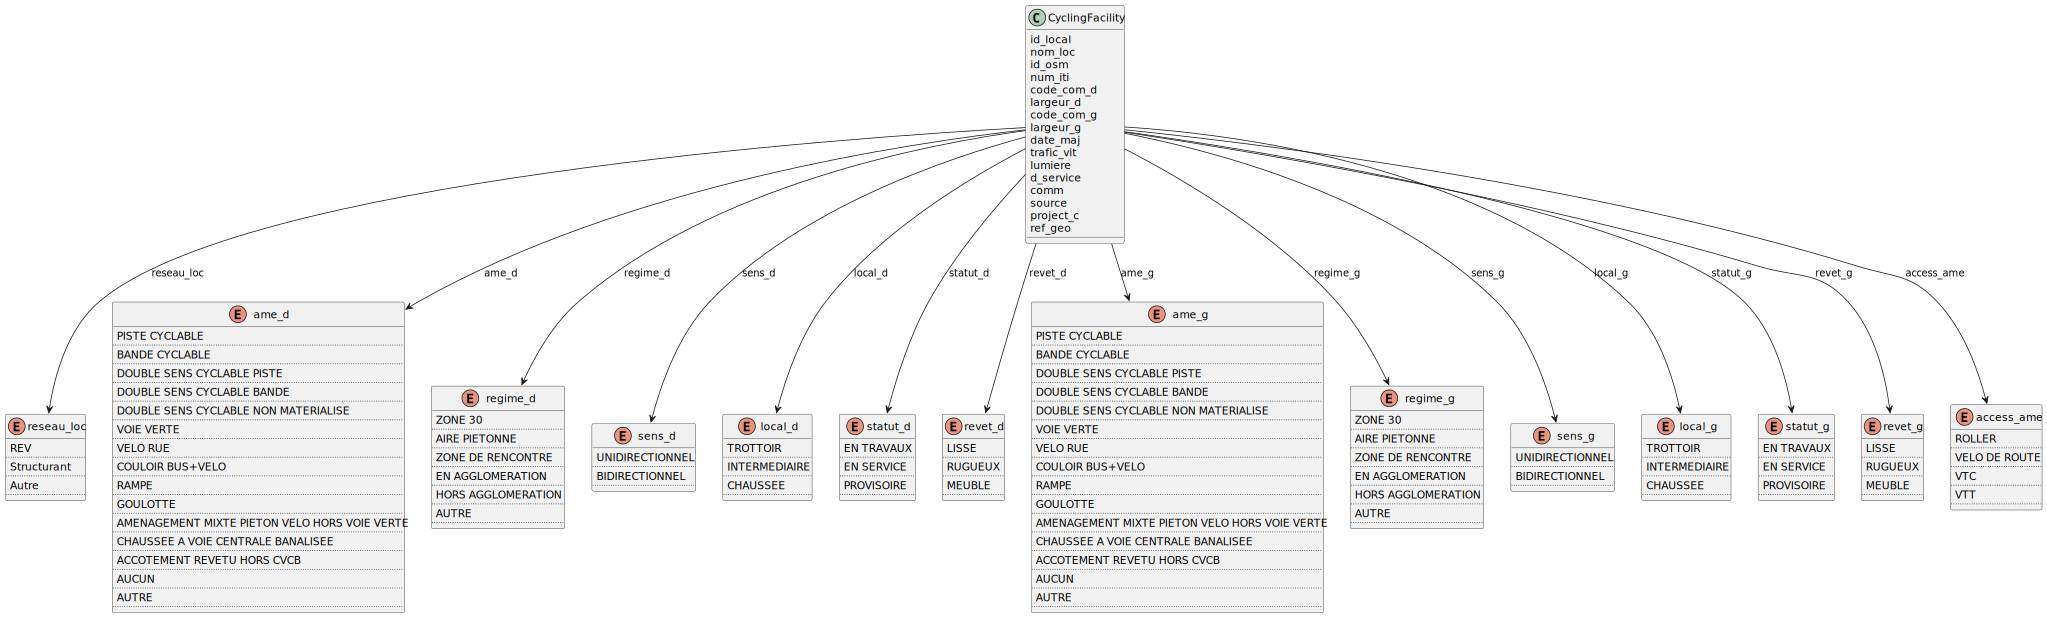

In [117]:
b0.show_semantic_model(True)

#### Simplification of the diagram for the demo

Here is a function to simplify the diagram into 3 enumeration bundles instead of 14.
For instance, we keep the `reseau_loc`, `revet_d` and `sens_d` enumeration bundles.

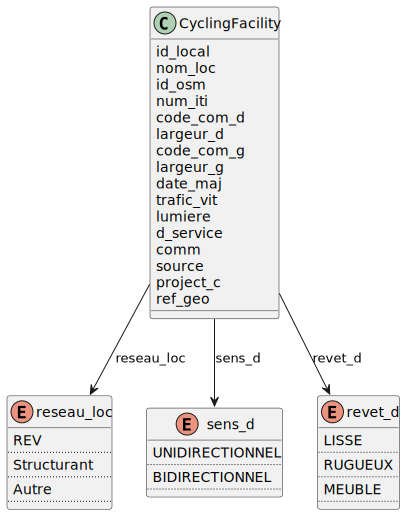

In [118]:
from BundleEnum import BundleEnum
from Bundle import Bundle

def reduce_BundleEnum_objects_for_demo(bundle: Bundle, to_keep: list):
    """
    simplify the bundle by decreasing the number of BundleEnums to only those mentionned in to_keep list
    """
    bundle.linked_to = [
        lkd for lkd in bundle.linked_to if lkd["destination"].name in to_keep
    ]

    # dataset update
    rest_of_enums = [
        lkd["destination"].source
        for lkd in bundle.linked_to
        if (
            lkd["destination"].name not in to_keep
            and type(lkd["destination"]) == BundleEnum
        )
    ]
    bundle.dataset.drop(columns=rest_of_enums, inplace=True)
    return bundle

b0 = reduce_BundleEnum_objects_for_demo(
    bundle=b0, to_keep=["reseau_loc", "revet_d", "sens_d"]
)
b0.show_semantic_model(True)

### 2. Transformers

In this example, we apply three transformers:
1. annotate
2. rename
3. split
4. document

#### 2.1 Annotate transformer

In [119]:
b0.annotate("http://schema.org/Thing", attributes={"nom_loc": "http://schema.org/name"})
b0.show()

------- Class -------
name : CyclingFacility
IRI : http://schema.org/Thing
definition : None
	 ------- attributes -------
	 name : id_local
	 IRI : None
	 definition : Identifiant unique pérenne défini par la collectivité
	 type : string
	 id : oui
	 required : oui
	 --------------
	 name : nom_loc
	 IRI : http://schema.org/name
	 definition : Nom et numéro des itinéraires locaux
	 type : array
	 id : non
	 required : non
	 --------------
	 name : id_osm
	 IRI : None
	 definition : Identifiant de l'aménagement sur OSM
	 type : string
	 id : non
	 required : non
	 --------------
	 name : num_iti
	 IRI : None
	 definition : Numéro des itinéraires, des EuroVelo au schéma départementaux, auxquels le segment appartient. Séparé par « : »
	 type : string
	 id : non
	 required : non
	 --------------
	 name : code_com_d
	 IRI : None
	 definition : Code INSEE de la commune (5 caractères alphanumériques) sur la voie de droite
	 type : string
	 id : non
	 required : oui
	 --------------
	 name : l

#### 2.2 Rename transformer

In [120]:
b0.rename(
     "CyclingInfrastructure",
     attributes={"id_local": "local_identifier"},
     associations={"reseau_loc": "haveReseau_loc"},
 )
b0.show()

------- Class -------
name : CyclingInfrastructure
IRI : http://schema.org/Thing
definition : None
	 ------- attributes -------
	 name : local_identifier
	 IRI : None
	 definition : Identifiant unique pérenne défini par la collectivité
	 type : string
	 id : oui
	 required : oui
	 --------------
	 name : nom_loc
	 IRI : http://schema.org/name
	 definition : Nom et numéro des itinéraires locaux
	 type : array
	 id : non
	 required : non
	 --------------
	 name : id_osm
	 IRI : None
	 definition : Identifiant de l'aménagement sur OSM
	 type : string
	 id : non
	 required : non
	 --------------
	 name : num_iti
	 IRI : None
	 definition : Numéro des itinéraires, des EuroVelo au schéma départementaux, auxquels le segment appartient. Séparé par « : »
	 type : string
	 id : non
	 required : non
	 --------------
	 name : code_com_d
	 IRI : None
	 definition : Code INSEE de la commune (5 caractères alphanumériques) sur la voie de droite
	 type : string
	 id : non
	 required : oui
	 -----------

In [121]:
b0.dataset.columns

Index(['local_identifier', 'reseau_loc', 'nom_loc', 'id_osm', 'num_iti',
       'code_com_d', 'ame_d', 'regime_d', 'sens_d', 'largeur_d', 'local_d',
       'statut_d', 'revet_d', 'code_com_g', 'ame_g', 'regime_g', 'sens_g',
       'largeur_g', 'local_g', 'statut_g', 'revet_g', 'access_ame', 'date_maj',
       'trafic_vit', 'lumiere', 'd_service', 'comm', 'source', 'project_c',
       'ref_geo', 'geometry'],
      dtype='object')

In [122]:
dangling_bundles = b0.children()
dangling_bundles["revet_d"].rename(enumeration_name = "revet_d_options")
dangling_bundles = b0.children()
dangling_bundles["revet_d_options"].show()

------- Enumeration -------
name : revet_d_options
IRI : None
definition : Type de revêtement de l'aménagement sur la voie de droite
type : string
required : non
	 ------- Values -------
	 name : LISSE
	 definition : None
	 IRI : None
	 --------------
	 name : RUGUEUX
	 definition : None
	 IRI : None
	 --------------
	 name : MEUBLE
	 definition : None
	 IRI : None
	 --------------


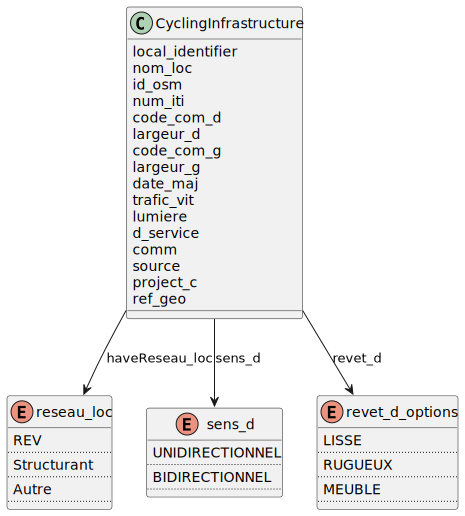

In [123]:
b0.show_semantic_model(True)

In [124]:
dangling_bundles["revet_d_options"].annotate(enum_values={
         "LISSE": "http://example/LISSE",
         "RUGUEUX": "http://example/RUGUEUX",
         "MEUBLE": "http://example/MEUBLE"
     })
dangling_bundles["revet_d_options"].show()

------- Enumeration -------
name : revet_d_options
IRI : None
definition : Type de revêtement de l'aménagement sur la voie de droite
type : string
required : non
	 ------- Values -------
	 name : LISSE
	 definition : None
	 IRI : http://example/LISSE
	 --------------
	 name : RUGUEUX
	 definition : None
	 IRI : http://example/RUGUEUX
	 --------------
	 name : MEUBLE
	 definition : None
	 IRI : http://example/MEUBLE
	 --------------


In [125]:
dangling_bundles["revet_d_options"].dataset

,revet_d_options
0,MEUBLE
1,NaN
2,LISSE


#### 2.3 Split transformer

We apply the `split` transformer on the *CyclingFacility* class bundle with:
- instances class identifier: *code_com_g*
- name of the new bundle [optional]: *Commune* 

In [126]:
b1 = b0.split(class_id = "code_com_g", new_class_name = "Commune")

##### Overview of the Semantic Model after `split` transformer

We apply `show_semantic_model` on the root bundle with `deep = True` to show the entire model

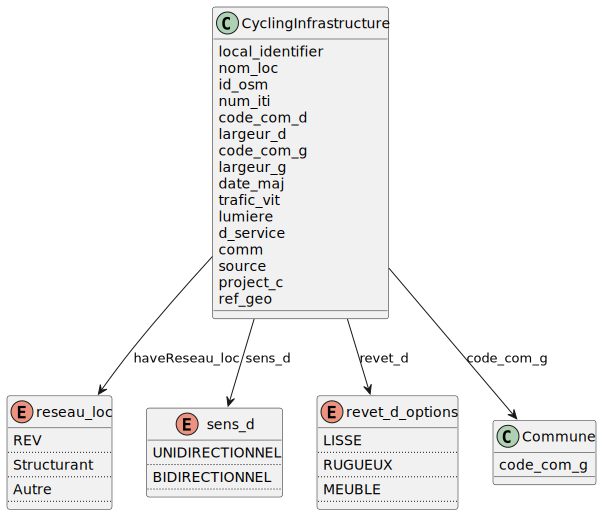

In [127]:
b0.show_semantic_model(True)

##### Overview of the *Commune* Semantic Model

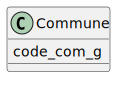

In [128]:
b1.show_semantic_model(True) # deep = True or deep = False has no impact here 

##### Overview of the *Commune* dataset

In [129]:
b1.dataset

,code_com_g
0,34058
1,34058
2,34058
3,34327
4,34057
...,...
95,34077
96,34077
97,34077
98,34077


#### 2.4 Document transformer

In [133]:
b1.annotate(class_IRI = "http://data.ign.fr/def/geofla#Commune")
dangling_bundles["reseau_loc"].document(enum_values={"REV":"REseau Vélo",
                                                    "Structurant" :"un sous maillage du REV"})
dangling_bundles["sens_d"].document(enum_values={"UNIDIRECTIONNEL":"Une seule direction",
                                                "BIDIRECTIONNEL": "Deux direction"})
dangling_bundles["revet_d_options"].document(enum_values={"LISSE":"Dont la surface est unie, polie, sans aspérités",
                                                          "RUGUEUX":"Dont la surface présente des aspérités, des irrégularités et qui est rude au toucher",
                                                          "MEUBLE":"Dont la surface a peu de cohésion"
                                                         })
b0.show(True)

------- Class -------
name : CyclingInfrastructure
IRI : http://schema.org/Thing
definition : None
	 ------- attributes -------
	 name : local_identifier
	 IRI : None
	 definition : Identifiant unique pérenne défini par la collectivité
	 type : string
	 id : oui
	 required : oui
	 --------------
	 name : nom_loc
	 IRI : http://schema.org/name
	 definition : Nom et numéro des itinéraires locaux
	 type : array
	 id : non
	 required : non
	 --------------
	 name : id_osm
	 IRI : None
	 definition : Identifiant de l'aménagement sur OSM
	 type : string
	 id : non
	 required : non
	 --------------
	 name : num_iti
	 IRI : None
	 definition : Numéro des itinéraires, des EuroVelo au schéma départementaux, auxquels le segment appartient. Séparé par « : »
	 type : string
	 id : non
	 required : non
	 --------------
	 name : code_com_d
	 IRI : None
	 definition : Code INSEE de la commune (5 caractères alphanumériques) sur la voie de droite
	 type : string
	 id : non
	 required : oui
	 -----------

### 3. Loaders

Presently, we propose two loaders:
1. generateOntology
2. generateRDF

#### 3.1 Generate the ontology

In [134]:
g, kpi_results = b0.generateOntology(True)

##### Overview of the generated ontology

In [135]:
kpi_results

,IRI,type,related
0,https://data.grandlyon.com/onto/localIdentifier,DatatypeProperty,CyclingInfrastructure
1,https://data.grandlyon.com/onto/idOsm,DatatypeProperty,CyclingInfrastructure
2,https://data.grandlyon.com/onto/numIti,DatatypeProperty,CyclingInfrastructure
3,https://data.grandlyon.com/onto/codeComD,DatatypeProperty,CyclingInfrastructure
4,https://data.grandlyon.com/onto/largeurD,DatatypeProperty,CyclingInfrastructure
5,https://data.grandlyon.com/onto/codeComG,DatatypeProperty,CyclingInfrastructure
6,https://data.grandlyon.com/onto/largeurG,DatatypeProperty,CyclingInfrastructure
7,https://data.grandlyon.com/onto/dateMaj,DatatypeProperty,CyclingInfrastructure
8,https://data.grandlyon.com/onto/traficVit,DatatypeProperty,CyclingInfrastructure
9,https://data.grandlyon.com/onto/lumiere,DatatypeProperty,CyclingInfrastructure


##### Save the ontology in a file

In [136]:
with open("./results/onto.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

#### 3.2 Generate the RDF data

In [137]:
g_rdf = b0.generateRDF(True)

##### Save the RDf data in a file

In [138]:
with open("./results/instances.ttl", "w") as f:
    f.write(g_rdf.serialize(format="turtle"))